# 📰 El Martillo - OCR y Análisis Digital
## Periódico Histórico de Chiclayo (1903-1919)

**Autor:** Bianca Peraltilla

**Fecha:** Nov 2025

**Objetivo:** Digitalizar y analizar una página del periódico histórico "El Martillo" usando Claude API para OCR.

## 1. Instalación de Dependencias

Ejecuta esta celda solo la primera vez:

In [2]:
%pip install anthropic pandas matplotlib seaborn pillow

Note: you may need to restart the kernel to use updated packages.


## 2. Importar Librerías

In [3]:
import anthropic
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import json
import os
from pathlib import Path

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 3. Configuración de la API de Claude

⚠️ **IMPORTANTE:** Reemplaza `"tu-api-key-aqui"` con tu API key real de Anthropic.

Obtén tu API key en: https://console.anthropic.com/

In [ ]:
# ⚠️ REEMPLAZA CON  API KEY REAL
API_KEY = "tu-api-key-aqui" 

client = anthropic.Anthropic(api_key=API_KEY)

print("✅ Cliente de Claude API configurado")

✅ Cliente de Claude API configurado


## 4. Funciones Auxiliares

### 4.1 Cargar y Codificar Imagen

In [6]:
def load_and_encode_image(image_path):
    """
    Carga una imagen y la convierte a base64 para enviarla a Claude API
    """
    with open(image_path, "rb") as image_file:
        image_data = base64.standard_b64encode(image_file.read()).decode("utf-8")
    
    # Detectar el tipo de imagen
    image_extension = Path(image_path).suffix.lower()
    media_type_map = {
        '.png': 'image/png',
        '.jpg': 'image/jpeg',
        '.jpeg': 'image/jpeg',
        '.gif': 'image/gif',
        '.webp': 'image/webp'
    }
    media_type = media_type_map.get(image_extension, 'image/png')
    
    return image_data, media_type

print("✅ Función de carga de imagen definida")

✅ Función de carga de imagen definida


### 4.2 Extracción de Texto con Claude

In [7]:
def extract_text_with_claude(image_path):
    """
    Usa Claude API para extraer texto estructurado de la página del periódico
    """
    image_data, media_type = load_and_encode_image(image_path)
    
    prompt = """
    Analiza esta página del periódico histórico "El Martillo" de Chiclayo, Perú.
    
    Por favor extrae y estructura la siguiente información en formato JSON:
    
    {
        "fecha": "fecha de publicación si está visible",
        "numero_edicion": "número de edición si está visible",
        "articulos": [
            {
                "titulo": "título del artículo",
                "seccion": "sección o categoría",
                "tipo": "artículo/anuncio/editorial/otro",
                "texto_extracto": "primeras 2-3 líneas del contenido"
            }
        ]
    }
    
    INSTRUCCIONES IMPORTANTES:
    - Extrae TODOS los artículos, anuncios y secciones visibles
    - Si el texto es difícil de leer debido a la calidad, indica [ilegible]
    - Clasifica cada elemento como: "artículo", "anuncio", "editorial", "aviso", u "otro"
    - Identifica las secciones principales del periódico
    - Mantén el texto original en español histórico
    
    Proporciona solo el JSON, sin texto adicional.
    """
    
    message = client.messages.create(
        model="claude-sonnet-4-20250514",
        max_tokens=4000,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": media_type,
                            "data": image_data,
                        },
                    },
                    {
                        "type": "text",
                        "text": prompt
                    }
                ],
            }
        ],
    )
    
    return message.content[0].text

print("✅ Función de extracción OCR definida")

✅ Función de extracción OCR definida


### 4.3 Procesar Resultado y Crear DataFrame

In [8]:
def process_ocr_result(ocr_text):
    """
    Convierte el resultado JSON de Claude en un DataFrame de pandas
    """
    # Limpiar el texto (eliminar markdown si existe)
    cleaned_text = ocr_text.strip()
    if cleaned_text.startswith("```json"):
        cleaned_text = cleaned_text[7:]
    if cleaned_text.startswith("```"):
        cleaned_text = cleaned_text[3:]
    if cleaned_text.endswith("```"):
        cleaned_text = cleaned_text[:-3]
    cleaned_text = cleaned_text.strip()
    
    # Parse JSON
    data = json.loads(cleaned_text)
    
    # Crear DataFrame
    articles = []
    for article in data.get('articulos', []):
        articles.append({
            'date': data.get('fecha', 'No disponible'),
            'issue_number': data.get('numero_edicion', 'No disponible'),
            'headline': article.get('titulo', ''),
            'section': article.get('seccion', 'General'),
            'type': article.get('tipo', 'otro'),
            'text_excerpt': article.get('texto_extracto', '')
        })
    
    df = pd.DataFrame(articles)
    return df

print("✅ Función de procesamiento de datos definida")

✅ Función de procesamiento de datos definida


## 5. EJECUCIÓN PRINCIPAL

### 5.1 Configurar Ruta de la Imagen

✅ Imagen encontrada: data/el_martillo/page_01.jpg


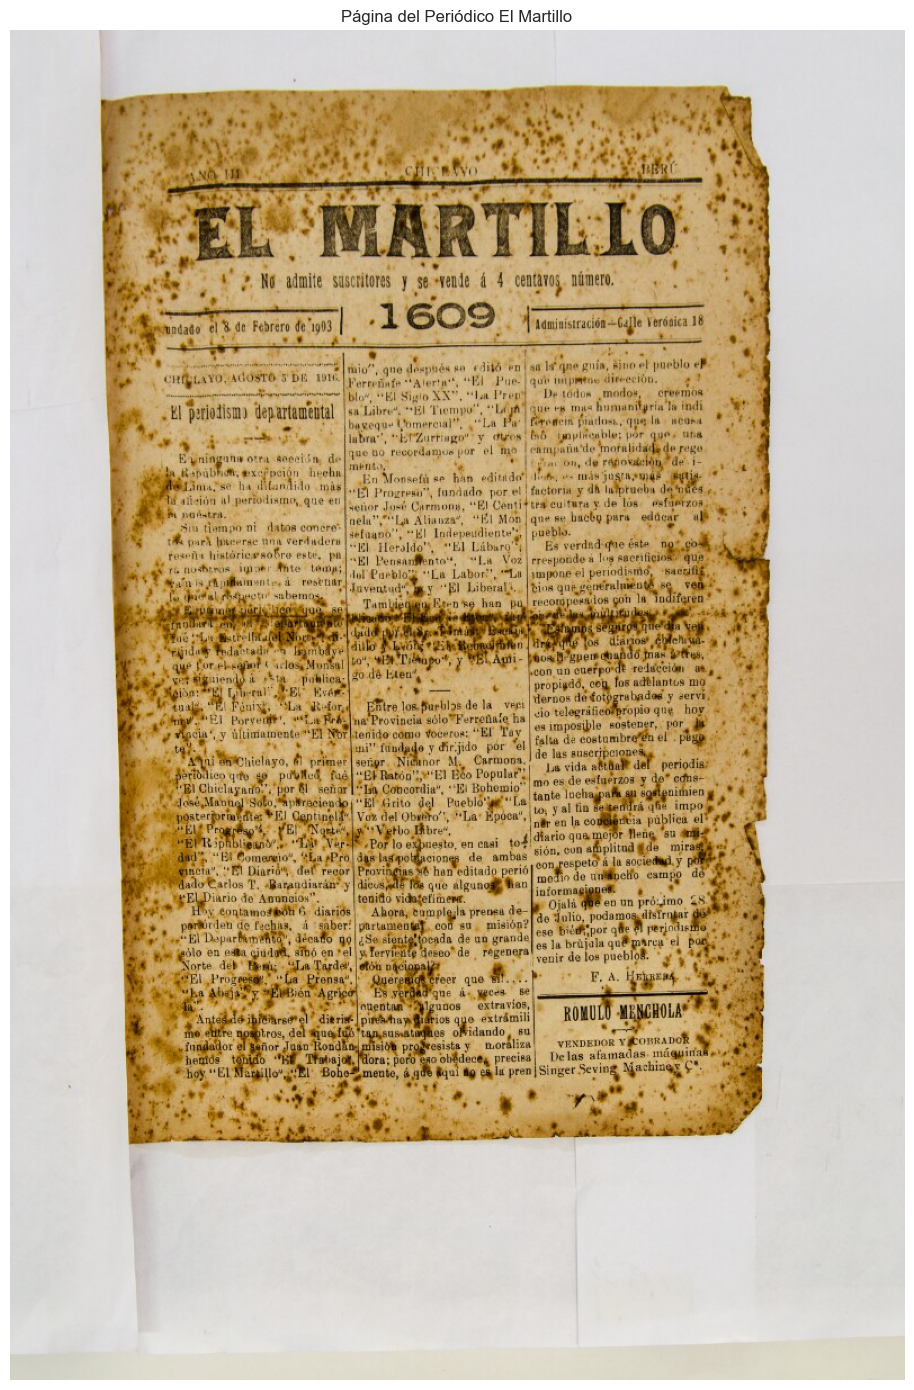

In [9]:
# Ruta a tu imagen del periódico
IMAGE_PATH = "data/el_martillo/page_01.jpg"

# Verificar que la imagen existe
if os.path.exists(IMAGE_PATH):
    print(f"✅ Imagen encontrada: {IMAGE_PATH}")
    # Mostrar la imagen
    img = Image.open(IMAGE_PATH)
    plt.figure(figsize=(10, 14))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Página del Periódico El Martillo')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ ERROR: No se encontró la imagen en {IMAGE_PATH}")
    print("Verifica que la ruta sea correcta.")

### 5.2 Ejecutar OCR con Claude

In [10]:
print("🔍 Extrayendo texto de la página del periódico...")
print(f"Archivo: {IMAGE_PATH}\n")

# Ejecutar OCR
ocr_result = extract_text_with_claude(IMAGE_PATH)
print("✅ Extracción completada\n")

🔍 Extrayendo texto de la página del periódico...
Archivo: data/el_martillo/page_01.jpg

✅ Extracción completada



### 5.3 Mostrar Resultado Raw

In [11]:
print("=" * 60)
print("RESULTADO RAW DE CLAUDE:")
print("=" * 60)
print(ocr_result)
print("\n")

RESULTADO RAW DE CLAUDE:
```json
{
    "fecha": "3 de Febrero de 1903",
    "numero_edicion": "1609",
    "articulos": [
        {
            "titulo": "El periodismo departamental",
            "seccion": "Editorial",
            "tipo": "editorial",
            "texto_extracto": "En ninguna otra sección de la República, el progreso ha hecho víctimas, se ha defendido con tanto ahinco de una parte, que en la nuestra."
        },
        {
            "titulo": "CHICLAYO, AGOSTO 3 DE 1903",
            "seccion": "Fecha/Encabezado",
            "tipo": "otro",
            "texto_extracto": "CHICLAYO, AGOSTO 3 DE 1903"
        },
        {
            "titulo": "[Artículo sobre periódicos locales]",
            "seccion": "Información Local",
            "tipo": "artículo",
            "texto_extracto": "que después un Chile en su la pregunta, sino el pueblo el que merece esa dirección. [ilegible] 'América', 'El Pueblo', que tuvieron dirección."
        },
        {
            "titulo"

### 5.4 Procesar y Crear Dataset

In [12]:
print("📊 Procesando datos...")
df = process_ocr_result(ocr_result)
print(f"✅ Dataset creado con {len(df)} entradas\n")

# Mostrar el dataset
print("=" * 60)
print("DATASET ESTRUCTURADO:")
print("=" * 60)
display(df)

📊 Procesando datos...
✅ Dataset creado con 6 entradas

DATASET ESTRUCTURADO:


,date,issue_number,headline,section,type,text_excerpt
0,3 de Febrero de 1903,1609,El periodismo departamental,Editorial,editorial,"En ninguna otra sección de la República, el pr..."
1,3 de Febrero de 1903,1609,"CHICLAYO, AGOSTO 3 DE 1903",Fecha/Encabezado,otro,"CHICLAYO, AGOSTO 3 DE 1903"
2,3 de Febrero de 1903,1609,[Artículo sobre periódicos locales],Información Local,artículo,"que después un Chile en su la pregunta, sino e..."
3,3 de Febrero de 1903,1609,Entre los Pueblos de la vía,Noticias Locales,artículo,Entre los Pueblos de la vía férrea están circu...
4,3 de Febrero de 1903,1609,RÓMULO MARCHOLA,Anuncios,anuncio,RÓMULO MARCHOLA VENDEDOR Y COMPRADOR de las af...
5,3 de Febrero de 1903,1609,[Información sobre publicaciones],Información General,artículo,"También hemos llegado por nuestras, 'Entre Ver..."


## 6. Guardar Dataset

In [13]:
OUTPUT_CSV = "data/el_martillo_structured.csv"
os.makedirs(os.path.dirname(OUTPUT_CSV), exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False, encoding='utf-8')
print(f"💾 Dataset guardado en: {OUTPUT_CSV}\n")

💾 Dataset guardado en: data/el_martillo_structured.csv



## 7. Análisis Exploratorio

### 7.1 Estadísticas Básicas

In [14]:
print("=" * 60)
print("ANÁLISIS EXPLORATORIO:")
print("=" * 60)

# Estadísticas básicas
print(f"Total de elementos extraídos: {len(df)}")
print(f"\nDistribución por tipo:")
print(df['type'].value_counts())
print(f"\nDistribución por sección:")
print(df['section'].value_counts())

ANÁLISIS EXPLORATORIO:
Total de elementos extraídos: 6

Distribución por tipo:
type
artículo     3
editorial    1
otro         1
anuncio      1
Name: count, dtype: int64

Distribución por sección:
section
Editorial              1
Fecha/Encabezado       1
Información Local      1
Noticias Locales       1
Anuncios               1
Información General    1
Name: count, dtype: int64


### 7.2 Información del Dataset

In [15]:
print("\nInformación del DataFrame:")
df.info()

print("\nPrimeras filas:")
display(df.head())

print("\nEstadísticas descriptivas:")
display(df.describe())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          6 non-null      object
 1   issue_number  6 non-null      object
 2   headline      6 non-null      object
 3   section       6 non-null      object
 4   type          6 non-null      object
 5   text_excerpt  6 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes

Primeras filas:


,date,issue_number,headline,section,type,text_excerpt
0,3 de Febrero de 1903,1609,El periodismo departamental,Editorial,editorial,"En ninguna otra sección de la República, el pr..."
1,3 de Febrero de 1903,1609,"CHICLAYO, AGOSTO 3 DE 1903",Fecha/Encabezado,otro,"CHICLAYO, AGOSTO 3 DE 1903"
2,3 de Febrero de 1903,1609,[Artículo sobre periódicos locales],Información Local,artículo,"que después un Chile en su la pregunta, sino e..."
3,3 de Febrero de 1903,1609,Entre los Pueblos de la vía,Noticias Locales,artículo,Entre los Pueblos de la vía férrea están circu...
4,3 de Febrero de 1903,1609,RÓMULO MARCHOLA,Anuncios,anuncio,RÓMULO MARCHOLA VENDEDOR Y COMPRADOR de las af...



Estadísticas descriptivas:


,date,issue_number,headline,section,type,text_excerpt
count,6,6,6,6,6,6
unique,1,1,6,6,4,6
top,3 de Febrero de 1903,1609,El periodismo departamental,Editorial,artículo,"En ninguna otra sección de la República, el pr..."
freq,6,6,1,1,3,1


## 8. Visualizaciones

### 8.1 Gráficos Principales

📈 Visualización guardada en: data/el_martillo_analysis.png


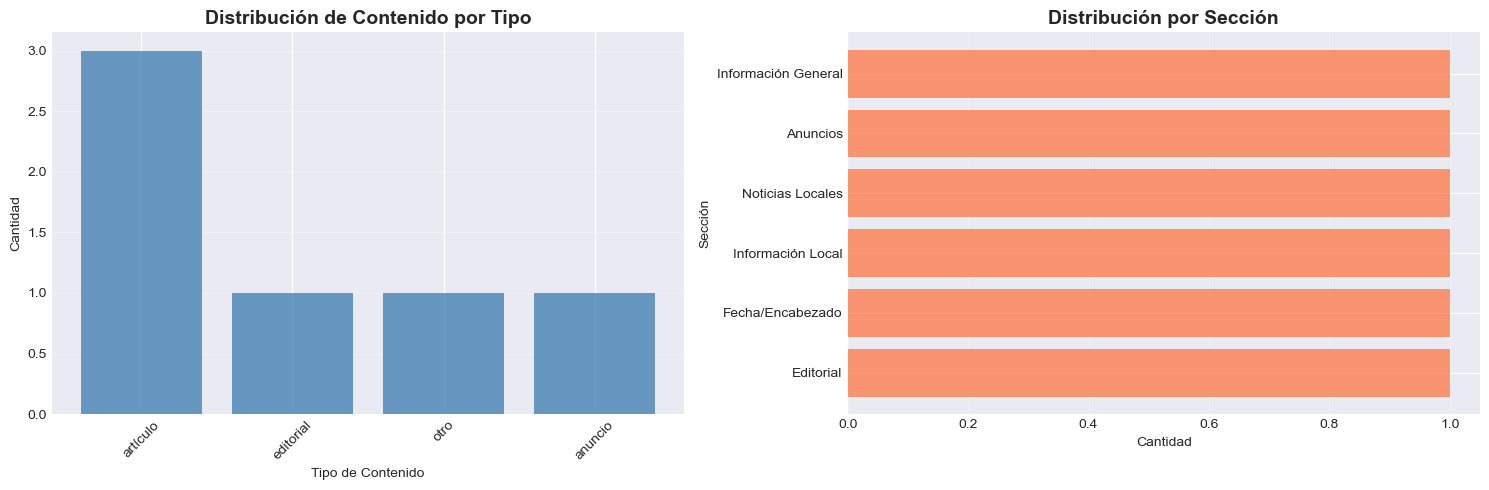

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribución por tipo
type_counts = df['type'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='steelblue', alpha=0.8)
axes[0].set_title('Distribución de Contenido por Tipo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Contenido')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Distribución por sección
section_counts = df['section'].value_counts()
axes[1].barh(section_counts.index, section_counts.values, color='coral', alpha=0.8)
axes[1].set_title('Distribución por Sección', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Sección')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('data/el_martillo_analysis.png', dpi=300, bbox_inches='tight')
print("📈 Visualización guardada en: data/el_martillo_analysis.png")
plt.show()

### 8.2 Gráfico de Pastel (Tipos de Contenido)

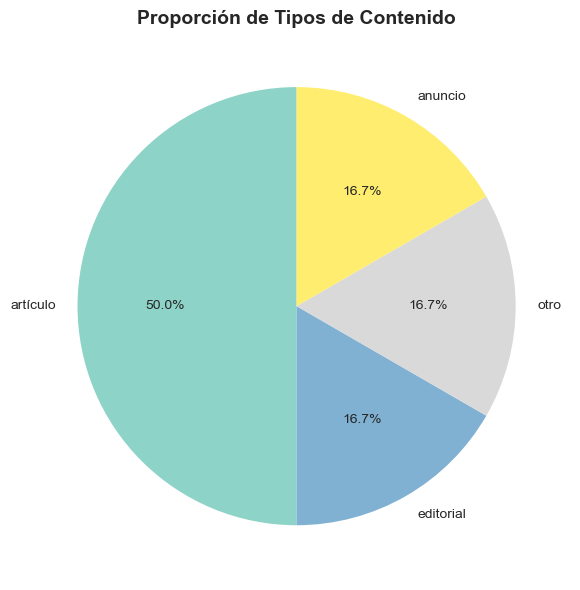

In [17]:
plt.figure(figsize=(10, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
plt.title('Proporción de Tipos de Contenido', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 9. Insights y Análisis

### 9.1 Métricas Adicionales

In [18]:
print("\n" + "=" * 60)
print("INSIGHTS:")
print("=" * 60)

# Longitud promedio de extractos
df['excerpt_length'] = df['text_excerpt'].str.len()
print(f"\n1. Longitud promedio de extractos: {df['excerpt_length'].mean():.0f} caracteres")
print(f"   - Extracto más corto: {df['excerpt_length'].min()} caracteres")
print(f"   - Extracto más largo: {df['excerpt_length'].max()} caracteres")

# Tipo más común
most_common_type = df['type'].mode()[0]
type_percentage = (df['type'].value_counts()[most_common_type] / len(df)) * 100
print(f"\n2. Tipo de contenido más común: {most_common_type} ({type_percentage:.1f}%)")

# Sección más común
most_common_section = df['section'].mode()[0]
section_percentage = (df['section'].value_counts()[most_common_section] / len(df)) * 100
print(f"\n3. Sección más frecuente: {most_common_section} ({section_percentage:.1f}%)")

# Fecha de publicación
print(f"\n4. Fecha de publicación: {df['date'].iloc[0]}")
print(f"   Número de edición: {df['issue_number'].iloc[0]}")


INSIGHTS:

1. Longitud promedio de extractos: 117 caracteres
   - Extracto más corto: 26 caracteres
   - Extracto más largo: 171 caracteres

2. Tipo de contenido más común: artículo (50.0%)

3. Sección más frecuente: Anuncios (16.7%)

4. Fecha de publicación: 3 de Febrero de 1903
   Número de edición: 1609


### 9.2 Muestra de Artículos por Tipo

In [19]:
print("\n" + "=" * 60)
print("EJEMPLOS DE CADA TIPO DE CONTENIDO:")
print("=" * 60)

for content_type in df['type'].unique():
    print(f"\n--- {content_type.upper()} ---")
    sample = df[df['type'] == content_type].head(2)
    for idx, row in sample.iterrows():
        print(f"\nTítulo: {row['headline']}")
        print(f"Sección: {row['section']}")
        print(f"Extracto: {row['text_excerpt'][:100]}...")
        print("-" * 40)


EJEMPLOS DE CADA TIPO DE CONTENIDO:

--- EDITORIAL ---

Título: El periodismo departamental
Sección: Editorial
Extracto: En ninguna otra sección de la República, el progreso ha hecho víctimas, se ha defendido con tanto ah...
----------------------------------------

--- OTRO ---

Título: CHICLAYO, AGOSTO 3 DE 1903
Sección: Fecha/Encabezado
Extracto: CHICLAYO, AGOSTO 3 DE 1903...
----------------------------------------

--- ARTÍCULO ---

Título: [Artículo sobre periódicos locales]
Sección: Información Local
Extracto: que después un Chile en su la pregunta, sino el pueblo el que merece esa dirección. [ilegible] 'Amér...
----------------------------------------

Título: Entre los Pueblos de la vía
Sección: Noticias Locales
Extracto: Entre los Pueblos de la vía férrea están circulando, tanto como vecinos, 'El Pueblo' y 'Tumán', corr...
----------------------------------------

--- ANUNCIO ---

Título: RÓMULO MARCHOLA
Sección: Anuncios
Extracto: RÓMULO MARCHOLA VENDEDOR Y COMPRADOR de las

## 10. Resumen Final

In [20]:
print("\n" + "="*60)
print("✅ ANÁLISIS COMPLETADO")
print("="*60)
print("\nArchivos generados:")
print(f"  📄 {OUTPUT_CSV}")
print(f"  📊 data/el_martillo_analysis.png")
print("\nPróximos pasos:")
print("  1. Revisa los datos en el CSV")
print("  2. Completa el archivo report.md con tus insights")
print("  3. Actualiza el README.md con información específica")
print("  4. Commit y push a GitHub")
print("\n¡Buen trabajo! 🎉")


✅ ANÁLISIS COMPLETADO

Archivos generados:
  📄 data/el_martillo_structured.csv
  📊 data/el_martillo_analysis.png

Próximos pasos:
  1. Revisa los datos en el CSV
  2. Completa el archivo report.md con tus insights
  3. Actualiza el README.md con información específica
  4. Commit y push a GitHub

¡Buen trabajo! 🎉
